In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.decomposition import PCA, NMF
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("./dataset/recipes_entrenamiento.csv")

In [79]:
X = data.iloc[:,6:15]

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)


In [80]:
model = KMeans(n_clusters=10, random_state=44)

data["cluster"] = model.fit_predict(X_scaled)

In [81]:
reductor = NMF(n_components=2)
x_reduced = reductor.fit_transform(X_scaled)

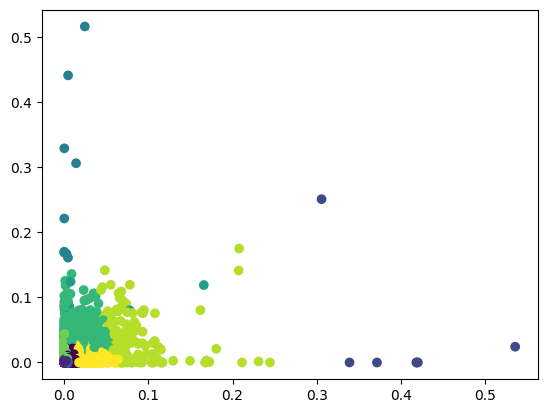

In [82]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=data["cluster"], cmap="viridis")

In [83]:
data["cluster"].value_counts()

cluster
1    176893
3     97867
7     26887
0     23492
9      1976
6       662
8       140
5        30
4         9
2         7
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
score = silhouette_score(X_scaled, data["cluster"])
print(f"Silhouette Score: {score}")